In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.genfromtxt('./data/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

In [4]:
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg)/(maxi - mini)
    X_b = np.c_[np.ones((N,1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)
X_b

array([[ 1.00000000e+00,  5.50426788e-01, -9.83586370e-02,
         7.57928475e-03],
       [ 1.00000000e+00, -7.57540486e-02, -9.32979082e-02,
        -7.37297571e-02],
       [ 1.00000000e+00, -1.67859312e-01, -7.10307018e-02,
         7.91666667e-03],
       [ 1.00000000e+00,  2.85244602e-01, -8.65502699e-02,
        -2.85205803e-02],
       [ 1.00000000e+00,  3.84097503e-01, -1.89451754e-01,
        -2.88579622e-02],
       [ 1.00000000e+00, -1.96536775e-01, -6.09092443e-02,
         2.71474359e-02],
       [ 1.00000000e+00, -3.18943995e-02, -1.15227733e-01,
        -1.46604251e-01],
       [ 1.00000000e+00,  1.79644062e-01, -1.59762146e-01,
        -1.86752699e-01],
       [ 1.00000000e+00, -1.96874157e-01, -2.18803981e-01,
        -2.22515182e-01],
       [ 1.00000000e+00,  4.48200067e-01, -2.17117072e-01,
        -1.54364035e-01],
       [ 1.00000000e+00, -2.87955466e-03, -2.06320850e-01,
        -1.44242578e-01],
       [ 1.00000000e+00,  4.98469973e-01, -1.44917341e-01,
      

In [5]:
thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
np.dot(X_b, thetas)

array([[0.57662043],
       [1.07270062],
       [1.2035544 ],
       [0.79969324],
       [0.57502387],
       [1.24690189],
       [0.98447068],
       [0.73701715],
       [0.95260517],
       [0.44653664],
       [0.83431705],
       [0.48878285],
       [1.13105958],
       [0.73889067],
       [0.60215698],
       [0.70279936],
       [1.0647511 ],
       [0.42978161],
       [0.88900607],
       [0.68984953],
       [0.54557162],
       [0.35664103],
       [1.0536377 ],
       [0.44005244],
       [0.87090449],
       [0.27458137],
       [0.72090448],
       [0.40316804],
       [0.42805855],
       [0.88654927],
       [0.33214571],
       [0.77396131],
       [0.73390554],
       [0.32549277],
       [0.71488848],
       [0.18948691],
       [0.4386326 ],
       [1.0373299 ],
       [1.00722816],
       [0.54460164],
       [0.54223225],
       [0.6721167 ],
       [0.2858136 ],
       [0.45942317],
       [1.0605294 ],
       [0.61883958],
       [0.79990299],
       [0.516

In [6]:
def stochastic_gradient_descent(X_b, y, n_epochs = 50, learning_rate = 0.00001):
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []
    N = len(X_b)

    for epochs in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N)
            random_index = i

            xi = X_b[random_index: random_index+1]
            yi = y[random_index: random_index+1]

            # compute output
            y_hat = np.dot(xi, thetas)

            # compute loss li
            li =(yi - y_hat)**2/2

            # compute gradient for loss
            dli = (y_hat - yi)

            # compute gradient
            dlidw = dli*xi

            # update theta
            thetas -= learning_rate*dlidw.T

            # logging
            thetas_path.append(thetas)
            losses.append(li.squeeze())

    return thetas_path, losses

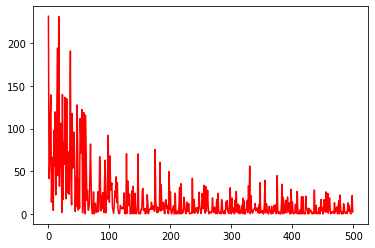

In [7]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

In [8]:
# Question 1:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate =0.01)
print(np.sum(losses))

6754.643359356192


In [9]:
# mini batch GD

def mini_batch_gradient_descent(X_b, y, n_epochs = 50,  minibatch_size = 20, learning_rate = 0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for _ in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])


        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # compute output
            yhat = np.dot(xi, thetas)
            
            # compute loss
            loss = (yi - yhat)**2/2

            # compute derivative of loss
            dli = (yhat-yi)/minibatch_size

            # compute derivative of parameters
            gradients = xi.T.dot(dli)

            # update parameters
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

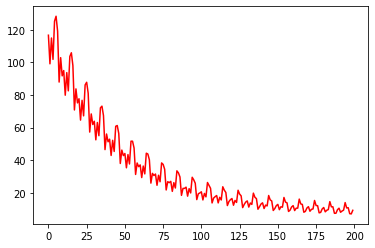

In [10]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate=0.01)
x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

In [11]:
# Question 2:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate=0.01)
print(round(sum(losses),2))

8865.65


In [16]:
thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
xt = X_b @ thetas
xt.shape

(200, 1)

In [27]:
def batch_gradient_descent(X_b, y, n_epochs = 100, learning_rate = 0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []
    N = len(X_b)

    for epochs in range(n_epochs):
        # compute output
        yhat = X_b @ thetas

        # compute loss 
        loss = (yhat - y)**2

        # compute loss’s derivative
        dl = 2*(yhat - y)/N

        # compute parameters's derivative
        gradients = X_b.T.dot(dl)

        # update parameters
        thetas -= learning_rate*gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)

    return thetas_path, losses

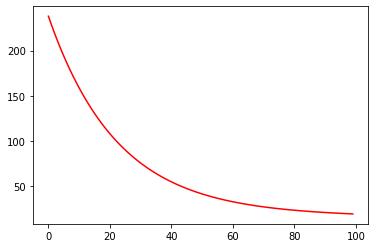

In [28]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate =0.01)
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [29]:
# Question 3: 
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate =0.01)
print(round(sum(losses),2))

6716.46
